In [11]:
from matplotlib import pyplot as plt
import os
import numpy as np
import json
from transformers import AutoTokenizer
from typing import Iterable, Union, Any
from pathlib import Path


file_dir = "../outputs/12_26/"
model_list = ["Qwen/Qwen2.5-32B-Instruct", "Qwen/Qwen2.5-14B-Instruct", "Qwen/Qwen2.5-7B-Instruct", "Qwen/Qwen2.5-3B-Instruct", "Qwen/Qwen2.5-1.5B-Instruct", "mistralai/Mathstral-7B-v0.1"]

prompt_type1 = "qwen25-math-cot"
prompt_type2 = "coarse-to-fine-qwen"
prompt_type3 = "mathstral-step-by-step"
prompt_type4 = "mathstral-coarse-to-fine"


In [12]:
def load_jsonl(file: Union[str, Path]) -> Iterable[Any]:
    with open(file, "r", encoding="utf-8") as f:
        for line in f:
            try:
                yield json.loads(line)
            except:
                print("Error in loading:", line)
                exit()

In [13]:
dataset = "gsm8k"
something = "_-1_seed0_t0.0_s0_e-1"
lengths_step_by_step = []
lengths_coarse_to_fine = []
for model in model_list:
    tokenizer = AutoTokenizer.from_pretrained(model)
    if model.startswith("Qwen"):
        path_step_by_step = "../outputs/12_26/" + model + "/" + prompt_type1 + "/" + dataset + "/test_" + prompt_type1 + something + ".jsonl"
        path_coarse_to_fine = "../outputs/12_26/" + model + "/" + prompt_type2 + "/" + dataset + "/test_" + prompt_type2 + something + ".jsonl"
    else:
        path_step_by_step = "../outputs/12_26/" + model + "/" + prompt_type3 + "/" + dataset + "/test_" + prompt_type3 + something + ".jsonl"
        path_coarse_to_fine = "../outputs/12_26/" + model + "/" + prompt_type4 + "/" + dataset + "/test_" + prompt_type4 + something + ".jsonl"
    data_step_by_step = load_jsonl(path_step_by_step)
    data_coarse_to_fine = load_jsonl(path_coarse_to_fine)
    length_step_by_step = [len(tokenizer.encode(output["code"][0])) for output in data_step_by_step]
    length_coarse_to_fine = [len(tokenizer.encode(output["code"][0])) for output in data_coarse_to_fine]
    if dataset == "math":
        length_step_by_step = [len for len in length_step_by_step if len <= 1500]
        length_coarse_to_fine = [len for len in length_coarse_to_fine if len <= 1500]
    else:
        length_step_by_step = [len for len in length_step_by_step if len <= 1000]
        length_coarse_to_fine = [len for len in length_coarse_to_fine if len <= 1000]
    lengths_step_by_step.append(length_step_by_step)
    lengths_coarse_to_fine.append(length_coarse_to_fine)

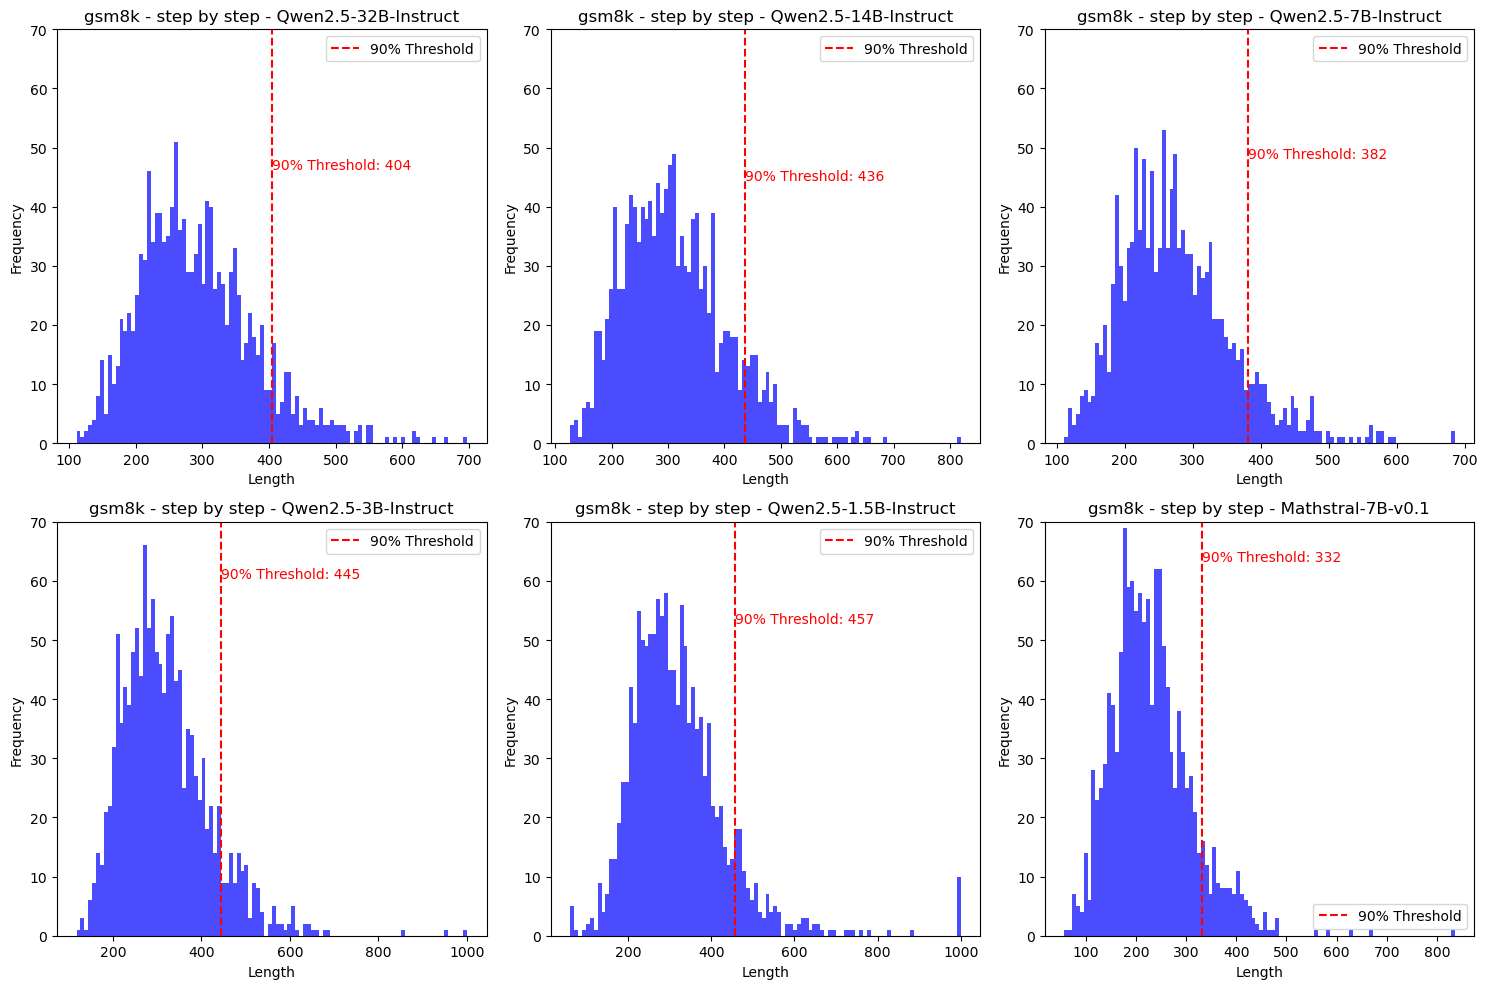

In [14]:
# plot for step by step, total 2*3 subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
for i, lengths in enumerate(lengths_step_by_step):
    row = i // 3  # Determine the row index (0 or 1)
    col = i % 3   # Determine the column index (0, 1, or 2)
    axs[row, col].hist(lengths, bins=100, color='blue', alpha=0.7)
    axs[row, col].set_title(f'{dataset} - step by step - {model_list[i].split("/")[-1]}')
    axs[row, col].set_xlabel('Length')
    axs[row, col].set_ylabel('Frequency')
    
    # Calculate the length that accounts for exactly 90% of the data
    total_count = len(lengths)
    threshold_index = int(0.9 * total_count)
    threshold_length = sorted(lengths)[threshold_index] if total_count > 0 else 0
    
    axs[row, col].axvline(threshold_length, color='red', linestyle='--', label='90% Threshold')
    axs[row, col].legend()
    axs[row, col].text(threshold_length, 0.9*axs[row, col].get_ylim()[1], f'90% Threshold: {threshold_length}', color='red', ha='left', va='top')
    axs[row, col].set_ylim(0, 70)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

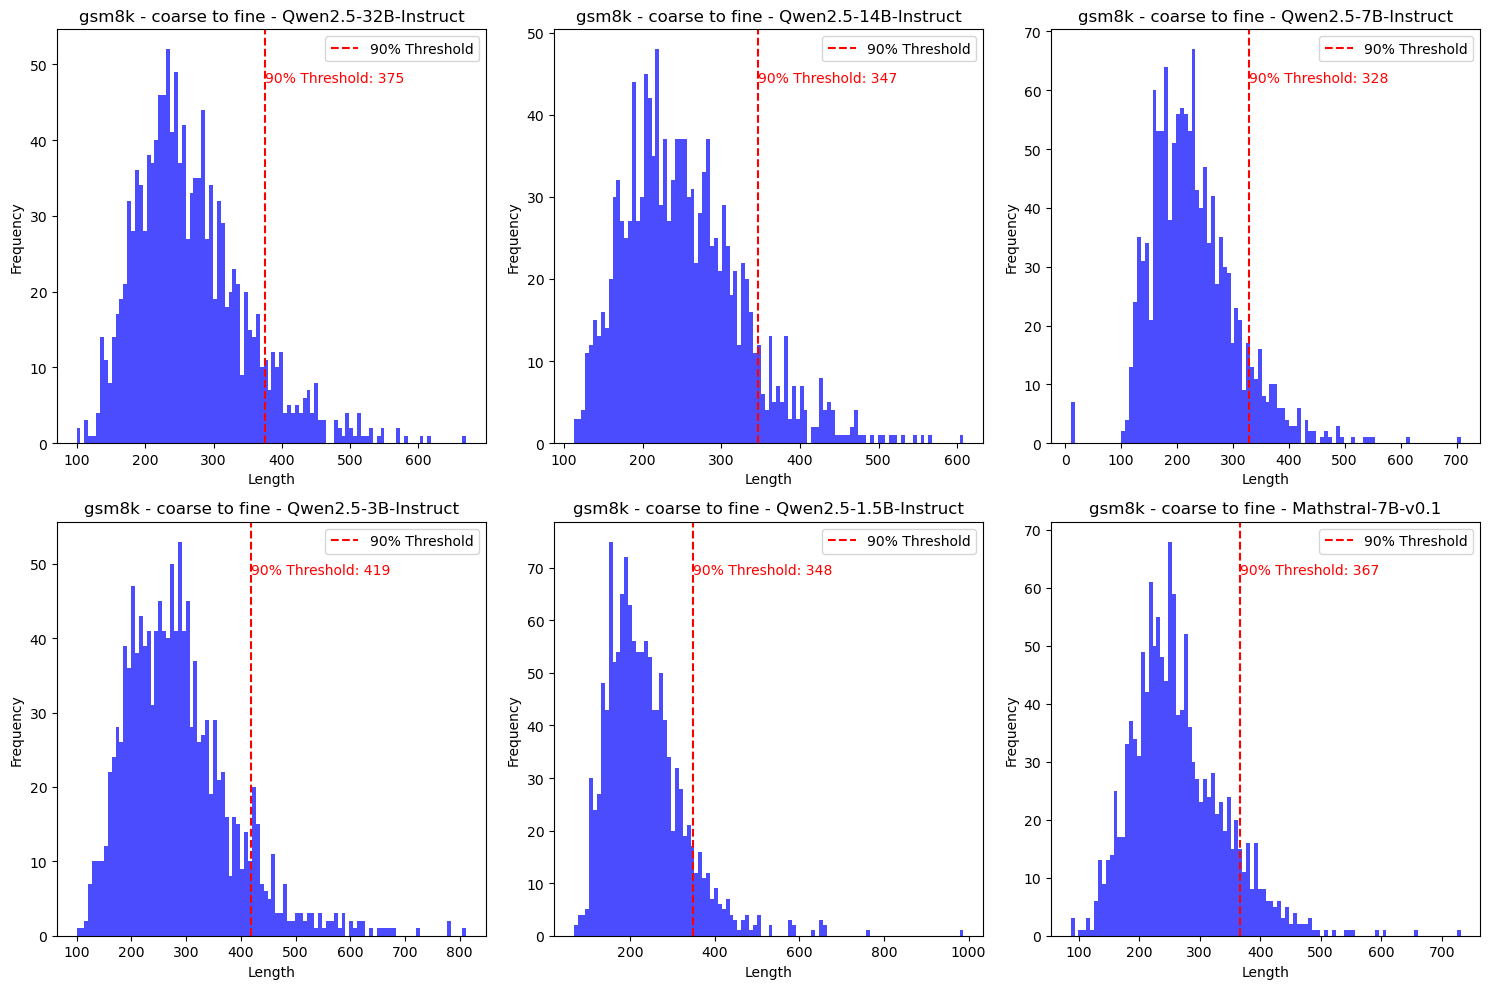

In [15]:
# plot for coarse to fine
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
for i, lengths in enumerate(lengths_coarse_to_fine):
    row = i // 3  # Determine the row index (0 or 1)
    col = i % 3   # Determine the column index (0, 1, or 2)
    axs[row, col].hist(lengths, bins=100, color='blue', alpha=0.7)
    axs[row, col].set_title(f'{dataset} - coarse to fine - {model_list[i].split("/")[-1]}')
    axs[row, col].set_xlabel('Length')
    axs[row, col].set_ylabel('Frequency')
    
    # Calculate the length that accounts for exactly 90% of the data
    total_count = len(lengths)
    threshold_index = int(0.9 * total_count)
    threshold_length = sorted(lengths)[threshold_index] if total_count > 0 else 0
    
    axs[row, col].axvline(threshold_length, color='red', linestyle='--', label='90% Threshold')
    axs[row, col].legend()
    axs[row, col].text(threshold_length, 0.9*axs[row, col].get_ylim()[1], f'90% Threshold: {threshold_length}', color='red', ha='left', va='top')
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


In [16]:
dataset = "math"
something = "_-1_seed0_t0.0_s0_e-1"
lengths_step_by_step = []
lengths_coarse_to_fine = []
for model in model_list:
    tokenizer = AutoTokenizer.from_pretrained(model)
    if model.startswith("Qwen"):
        path_step_by_step = "../outputs/12_26/" + model + "/" + prompt_type1 + "/" + dataset + "/test_" + prompt_type1 + something + ".jsonl"
        path_coarse_to_fine = "../outputs/12_26/" + model + "/" + prompt_type2 + "/" + dataset + "/test_" + prompt_type2 + something + ".jsonl"
    else:
        path_step_by_step = "../outputs/12_26/" + model + "/" + prompt_type3 + "/" + dataset + "/test_" + prompt_type3 + something + ".jsonl"
        path_coarse_to_fine = "../outputs/12_26/" + model + "/" + prompt_type4 + "/" + dataset + "/test_" + prompt_type4 + something + ".jsonl"
    data_step_by_step = load_jsonl(path_step_by_step)
    data_coarse_to_fine = load_jsonl(path_coarse_to_fine)
    length_step_by_step = [len(tokenizer.encode(output["code"][0])) for output in data_step_by_step]
    length_coarse_to_fine = [len(tokenizer.encode(output["code"][0])) for output in data_coarse_to_fine]
    if dataset == "math":
        length_step_by_step = [len for len in length_step_by_step if len <= 1500]
        length_coarse_to_fine = [len for len in length_coarse_to_fine if len <= 1500]
    else:
        length_step_by_step = [len for len in length_step_by_step if len <= 1000]
        length_coarse_to_fine = [len for len in length_coarse_to_fine if len <= 1000]
    lengths_step_by_step.append(length_step_by_step)
    lengths_coarse_to_fine.append(length_coarse_to_fine)

FileNotFoundError: [Errno 2] No such file or directory: '../outputs/12_26/Qwen/Qwen2.5-32B-Instruct/qwen25-step-by-step-hard/math/test_qwen25-step-by-step-hard_-1_seed0_t0.0_s0_e-1.jsonl'

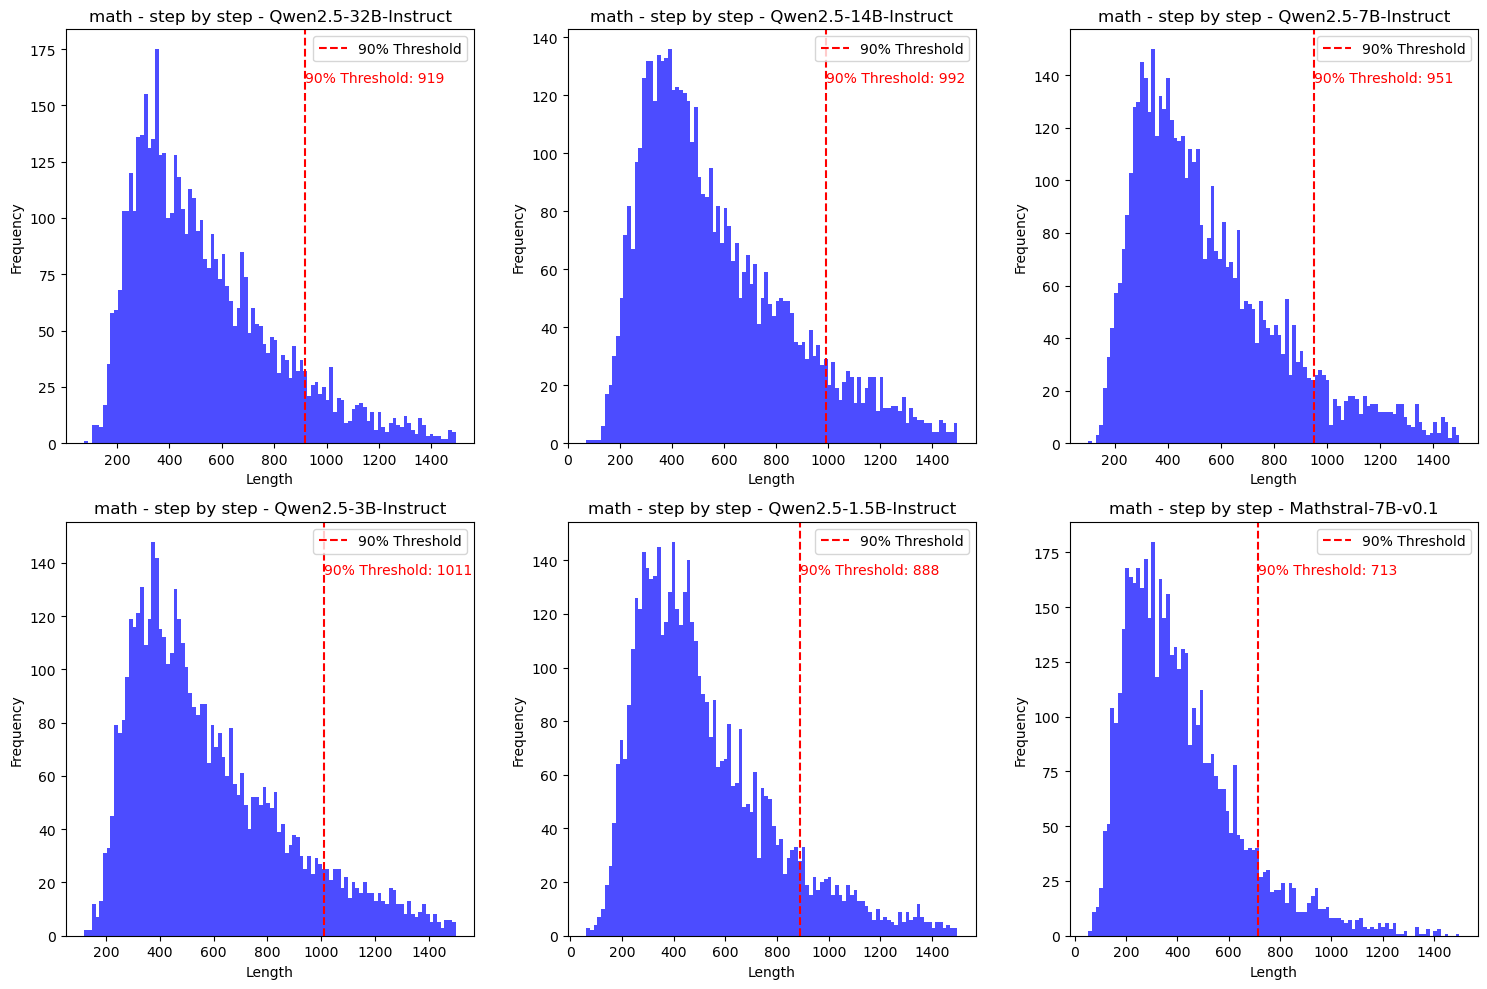

In [45]:
# plot for step by step, total 2*3 subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
for i, lengths in enumerate(lengths_step_by_step):
    row = i // 3  # Determine the row index (0 or 1)
    col = i % 3   # Determine the column index (0, 1, or 2)
    axs[row, col].hist(lengths, bins=100, color='blue', alpha=0.7)
    axs[row, col].set_title(f'{dataset} - step by step - {model_list[i].split("/")[-1]}')
    axs[row, col].set_xlabel('Length')
    axs[row, col].set_ylabel('Frequency')
    
    # Calculate the length that accounts for exactly 90% of the data
    total_count = len(lengths)
    threshold_index = int(0.9 * total_count)
    threshold_length = sorted(lengths)[threshold_index] if total_count > 0 else 0
    
    axs[row, col].axvline(threshold_length, color='red', linestyle='--', label='90% Threshold')
    axs[row, col].legend()
    axs[row, col].text(threshold_length, 0.9*axs[row, col].get_ylim()[1], f'90% Threshold: {threshold_length}', color='red', ha='left', va='top')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

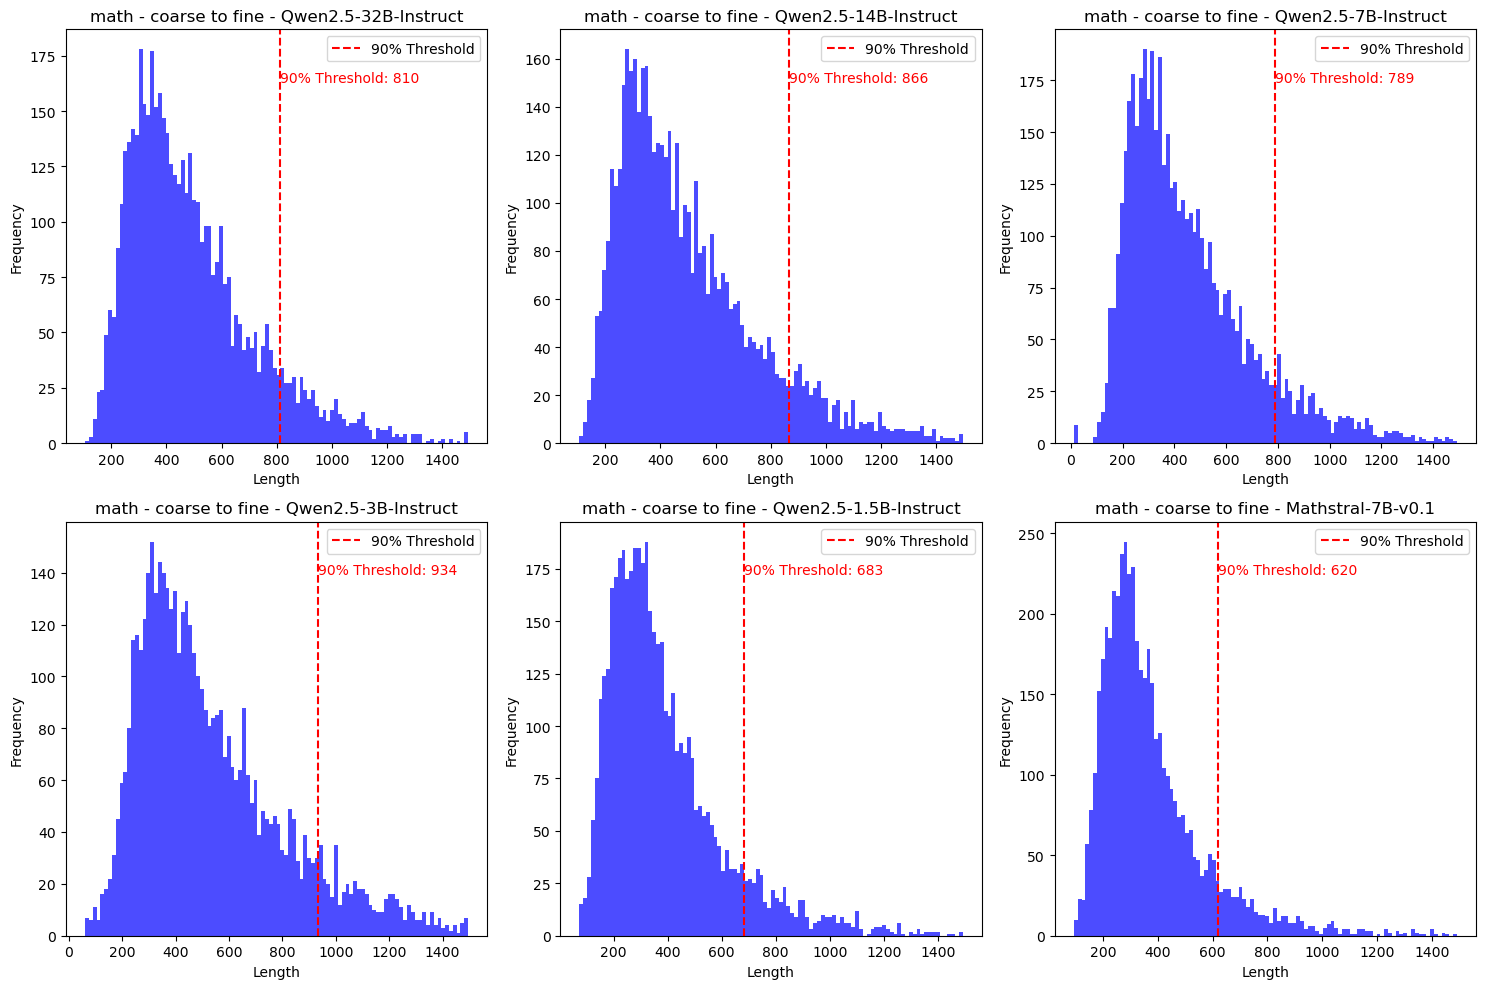

In [46]:
# plot for coarse to fine
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
for i, lengths in enumerate(lengths_coarse_to_fine):
    row = i // 3  # Determine the row index (0 or 1)
    col = i % 3   # Determine the column index (0, 1, or 2)
    axs[row, col].hist(lengths, bins=100, color='blue', alpha=0.7)
    axs[row, col].set_title(f'{dataset} - coarse to fine - {model_list[i].split("/")[-1]}')
    axs[row, col].set_xlabel('Length')
    axs[row, col].set_ylabel('Frequency')
    
    # Calculate the length that accounts for exactly 90% of the data
    total_count = len(lengths)
    threshold_index = int(0.9 * total_count)
    threshold_length = sorted(lengths)[threshold_index] if total_count > 0 else 0
    
    axs[row, col].axvline(threshold_length, color='red', linestyle='--', label='90% Threshold')
    axs[row, col].legend()
    axs[row, col].text(threshold_length, 0.9*axs[row, col].get_ylim()[1], f'90% Threshold: {threshold_length}', color='red', ha='left', va='top')
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [1]:
something = "_-1_seed0_t0.0_s0_e-1"
path = "../outputs/12_26/mistralai/Mathstral-7B-v0.1/" + prompt_type4 + "/" + dataset + "/test_" + prompt_type4 + something + "_b200.jsonl"
# path = "../outputs/12_26/Qwen/Qwen2.5-7B-Instruct/" + prompt_type2 + "/" + dataset + "/test_" + prompt_type2 + something + "_b200.jsonl"
tokenizer = AutoTokenizer.from_pretrained("Qwen/Qwen2.5-7B-Instruct")
data = load_jsonl(path)
length_1 = [len(tokenizer.encode(output["code"][0])) for output in data]
length_1 = [len for len in length_1 if len <= 2000]
print(len(length_1))
# plot length_1
plt.hist(length_1, bins=100)
plt.show()

NameError: name 'model_list' is not defined

In [4]:
dataset = "math"

In [5]:
something = "_-1_seed0_t0.0_s0_e-1"
length_1s = []
length_2s = []
length_ratios = []
for model in model_list:
    outputs1 = load_jsonl(os.path.join(file_dir, model, prompt_type1, dataset, "test_" + prompt_type1 + something + ".jsonl"))
    outputs2 = load_jsonl(os.path.join(file_dir, model, prompt_type2, dataset, "test_" + prompt_type2 + something + ".jsonl"))
    # use tokenizer to get length   
    tokenizer = AutoTokenizer.from_pretrained(model)
    length_1 = [len(tokenizer.encode(output["code"][0])) for output in outputs1]
    length_1s.append(length_1)
    length_2 = [len(tokenizer.encode(output["code"][0])) for output in outputs2]
    length_2s.append(length_2)
    length_ratios.append([len2/len1 for len1, len2 in zip(length_1, length_2)])


Error in loading: {"idx": 3, "question": "At 2:30 p.m. during a long drive, Bobbi asks her parents, ``Are we there yet?'' Her mother responds, ``We will be there in 7200 seconds.'' If Bobbi's mother is correct, at what time in the afternoon will they arrive at their destination?", "gt_cot": "Multiply 7200 seconds by $\\left(\\frac{1\\text{ min.}}{60\\text{ sec.}}\\right)\\left(\\frac{1\\text{ hr.}}{60\\text{ min.}}\\right)$ to find that they will arrive in 2 hours.  Two hours after 2:30 p.m. is $\\boxed{\\text{4:30 p.m.}}$.", "gt": "4:30p..", "prompt": "<|im_start|>system\nPlease reason step by step, and put your final answer within \\boxed{}.<|im_end|>\n<|im_start|>user\nAt 2:30 p.m. during a long drive, Bobbi asks her parents, ``Are we there yet?'' Her mother responds, ``We will be there in 7200 seconds.'' If Bobbi's mother is correct, at what time in the afternoon will they arrive at their destination?<|im_end|>\n<|im_start|>assistant\n", "level": "Level 3", "solution": "Multiply 72

KeyboardInterrupt: 

: 

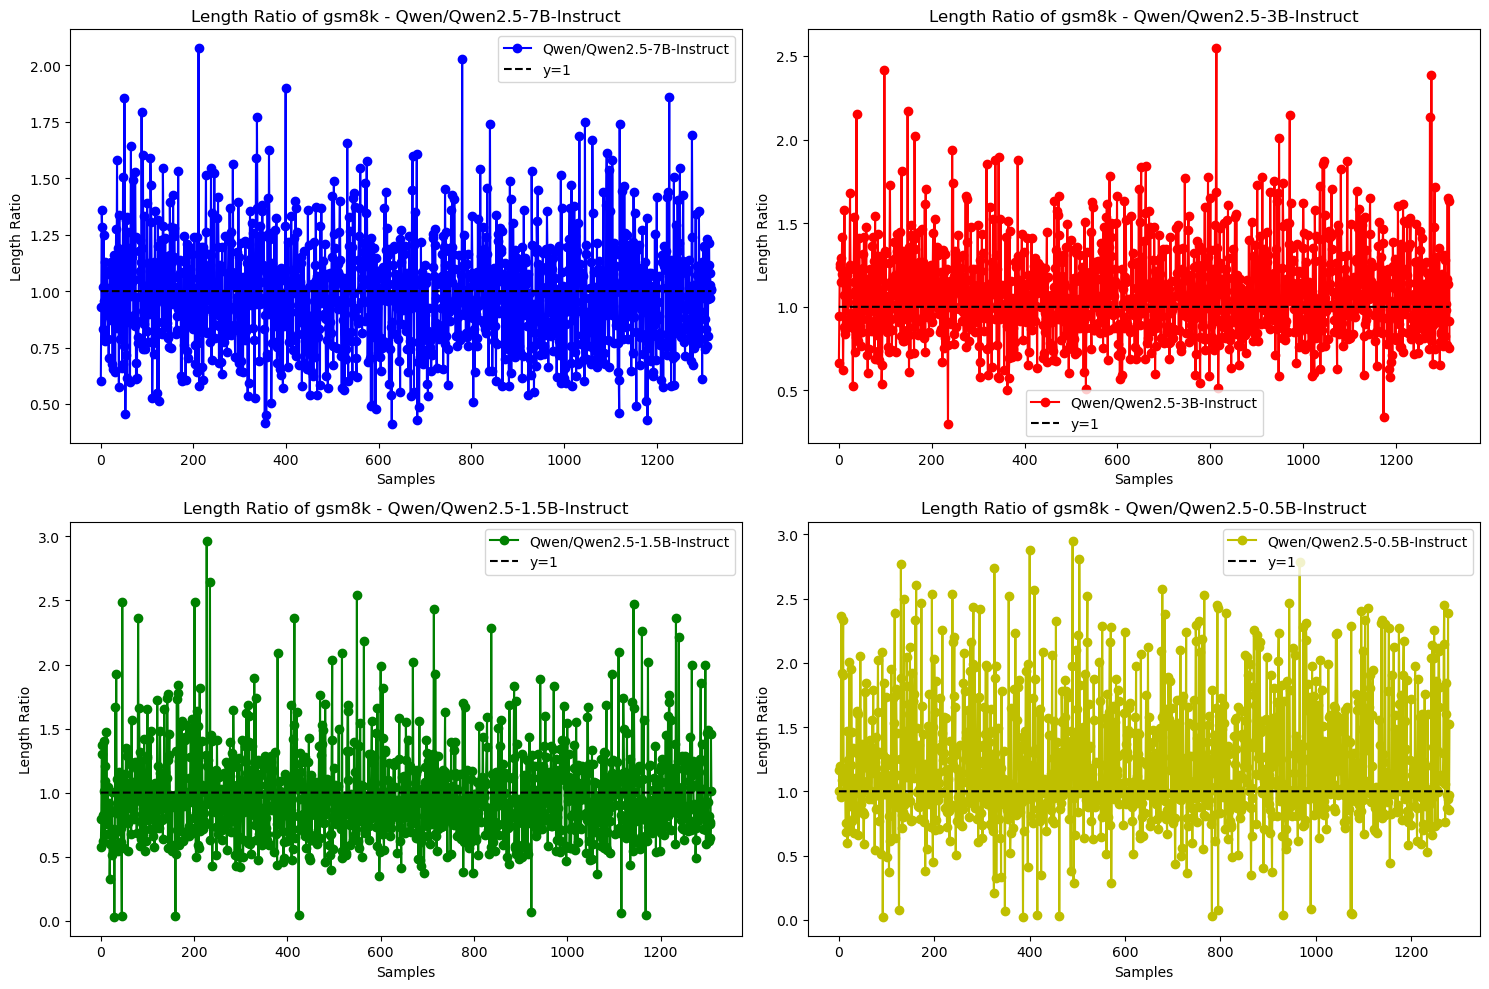

In [64]:
# move ratios larger than 3
length_ratios = [[ratio for ratio in ratios if ratio <= 3] for ratios in length_ratios]

fig, axs = plt.subplots(2, 2, figsize=(15, 10))

x1 = len(length_ratios[0])
x2 = len(length_ratios[1])
x3 = len(length_ratios[2])
x4 = len(length_ratios[3])
axs[0, 0].plot(range(x1), length_ratios[0], marker='o', color='b', label=model_list[0])
axs[0, 0].plot(range(x1), [1]*x1, color='k', linestyle='--', label='y=1')
axs[0, 0].set_xlabel('Samples')
axs[0, 0].set_ylabel('Length Ratio')
axs[0, 0].set_title('Length Ratio of ' + dataset + ' - ' + model_list[0])
axs[0, 0].legend()

axs[0, 1].plot(range(x2), length_ratios[1], marker='o', color='r', label=model_list[1])
axs[0, 1].plot(range(x2), [1]*x2, color='k', linestyle='--', label='y=1')
axs[0, 1].set_xlabel('Samples')
axs[0, 1].set_ylabel('Length Ratio')
axs[0, 1].set_title('Length Ratio of ' + dataset + ' - ' + model_list[1])
axs[0, 1].legend()

axs[1, 0].plot(range(x3), length_ratios[2], marker='o', color='g', label=model_list[2])
axs[1, 0].plot(range(x3), [1]*x3, color='k', linestyle='--', label='y=1')
axs[1, 0].set_xlabel('Samples')
axs[1, 0].set_ylabel('Length Ratio')
axs[1, 0].set_title('Length Ratio of ' + dataset + ' - ' + model_list[2])
axs[1, 0].legend()

axs[1, 1].plot(range(x4), length_ratios[3], marker='o', color='y', label=model_list[3])
axs[1, 1].plot(range(x4), [1]*x4, color='k', linestyle='--', label='y=1')
axs[1, 1].set_xlabel('Samples')
axs[1, 1].set_ylabel('Length Ratio')
axs[1, 1].set_title('Length Ratio of ' + dataset + ' - ' + model_list[3])
axs[1, 1].legend()

plt.tight_layout()
plt.show()
# # print percentage of length ratio greater than 0.9 and less than 2
# print(len([ratio for ratio in length_ratios[0] if ratio > 0.9 and ratio < 2]) / len(length_ratios[0]))
# print(len([ratio for ratio in length_ratios[1] if ratio > 0.9 and ratio < 2]) / len(length_ratios[1]))
# print(len([ratio for ratio in length_ratios[2] if ratio > 0.9 and ratio < 2]) / len(length_ratios[2]))
# print(len([ratio for ratio in length_ratios[3] if ratio > 0.9 and ratio < 2]) / len(length_ratios[3]))


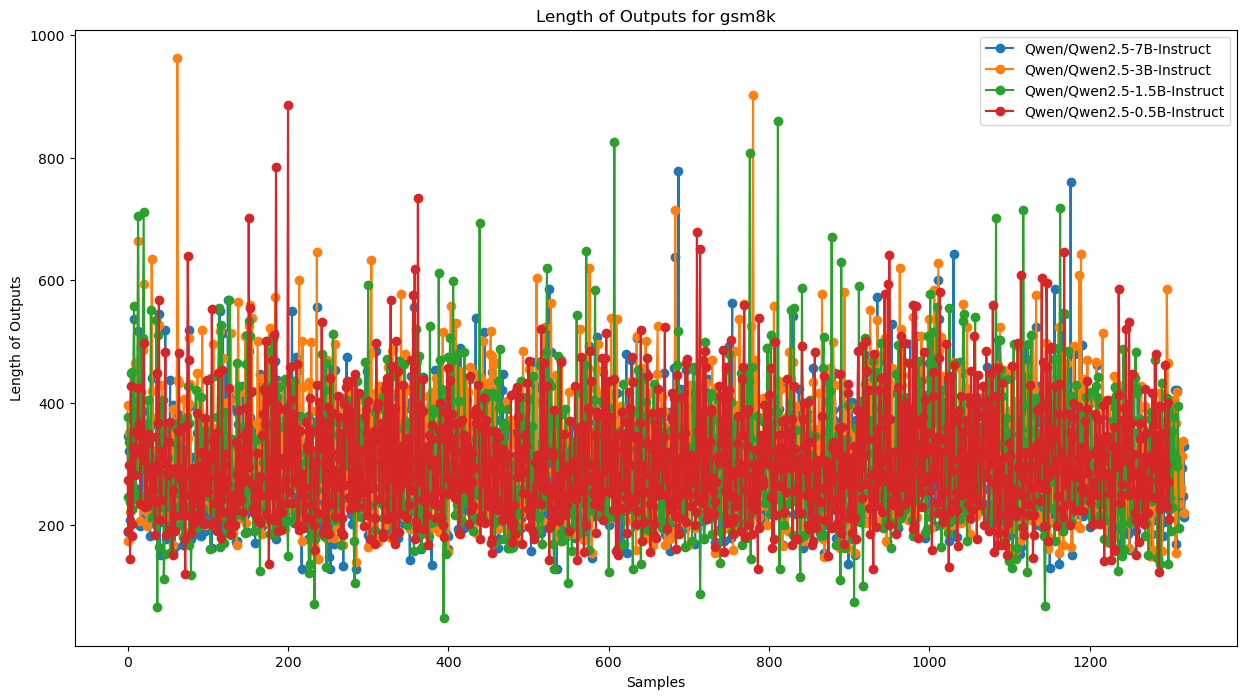

[298.43821076573164, 318.592564491654, 305.609756097561, 305.6146153846154]
1319
1318
1312
1300


In [65]:
length_1s = [[length for length in length_1 if length <= 1000] for length_1 in length_1s]

plt.figure(figsize=(15, 8))
for i, lengths in enumerate(length_1s):
    plt.plot(range(len(lengths)), lengths, marker='o', label=model_list[i])
plt.xlabel('Samples')
plt.ylabel('Length of Outputs')
plt.title('Length of Outputs for ' + dataset)
plt.legend()
plt.show()
print([np.mean(lengths) for lengths in length_1s])
print(len(length_1s[0]))
print(len(length_1s[1]))
print(len(length_1s[2]))
print(len(length_1s[3]))


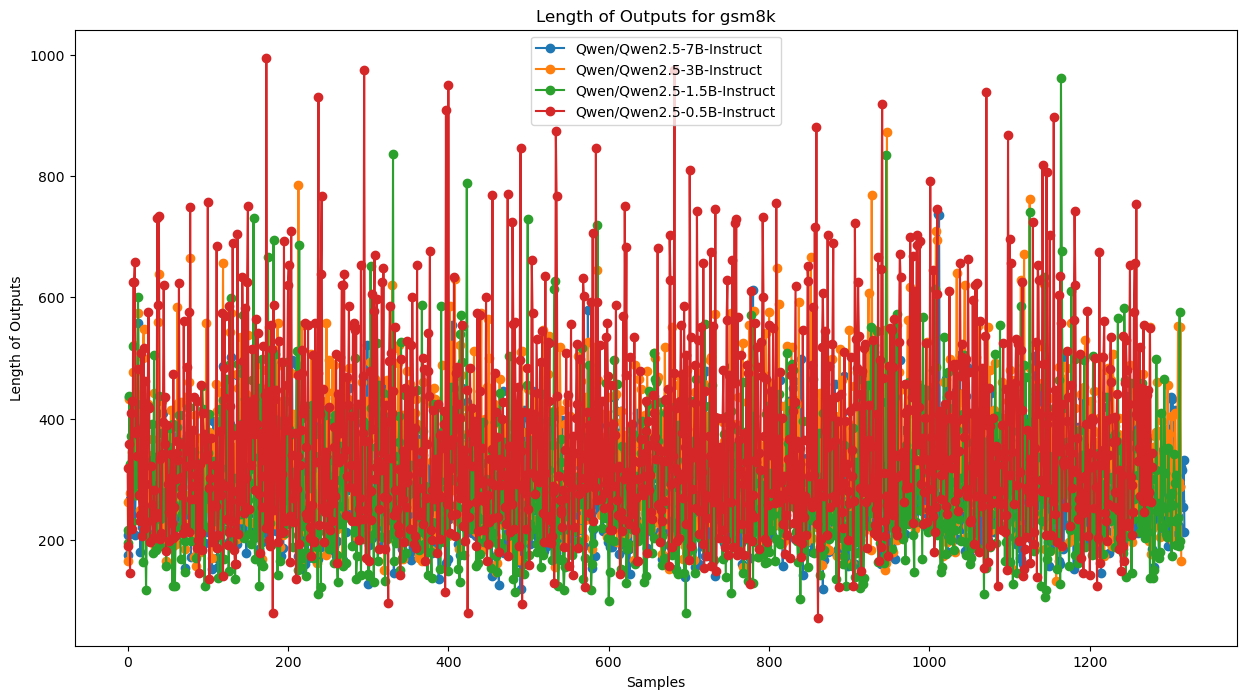

[283.34571645185747, 335.4441064638783, 287.6993911719939, 366.3979671618452]
1319
1315
1314
1279


In [66]:
length_2s = [[length for length in length_2 if length <= 1000] for length_2 in length_2s]

plt.figure(figsize=(15, 8))
for i, lengths in enumerate(length_2s):
    plt.plot(range(len(lengths)), lengths, marker='o', label=model_list[i])
plt.xlabel('Samples')
plt.ylabel('Length of Outputs')
plt.title('Length of Outputs for ' + dataset)
plt.legend()
plt.show()
print([np.mean(lengths) for lengths in length_2s])
print(len(length_2s[0]))
print(len(length_2s[1]))
print(len(length_2s[2]))
print(len(length_2s[3]))
